In [ ]:
import pandas as pd
from IPython.display import display

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/amazon-database-Akram.xlsx'

try:
    df = pd.read_excel(file_path, engine='openpyxl')


    display(df.head(10))

except Exception as e:
    print(f"Ошибка при загрузке файла с движком openpyxl: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Название товара,Цена,Продажи за месяц,Общее количество рейтингов,Рейтинг
0,EUKI Compressed Air Duster-150000RPM Electric ...,$59.99,400+,234,4.6
1,"8Bitdo Arcade Stick for Switch & Windows, Arca...",$89.99,400+,3.949,4.6
2,External CD/DVD Drive for Laptop with Carrying...,$34.99,500+,139,4.4
3,Tablet Floor Stand with 11lb Stable Base - Adj...,$69.99,400+,253,4.6
4,Computer Speakers - Wired USB Powered Bluetoot...,$14.99,500+,185,4.1
5,"USB C SD Memory Card Reader, Type C Camera Ada...",$9.99,500+,354,4.0
6,Print.Save.Repeat. Lexmark B231000 Remanufactu...,$129.95,200+,153,4.6
7,"VIVO 1,000ft Bulk Cat5e Wire, CCA Ethernet Cab...",$64.99,300+,1.412,4.2
8,"CableCreation 1FT USB C to Micro B Cable,10Gbp...",$9.40,1.000+,13.871,4.7
9,EPSON 552 EcoTank Ink Ultra-high Capacity Bott...,$21.99,600+,304,4.9


In [ ]:
df['Цена'] = df['Цена'].replace({'\$': '','\+': '', ',': '', ' ': ''}, regex=True)
df['Продажи за месяц'] = df['Продажи за месяц'].replace({'\$': '','\+': '', ',': '', ' ': ''}, regex=True)
df['Рейтинг'] = df['Рейтинг'].replace({'\$': '','\+': '', ',': '', ' ': ''}, regex=True)

df['Цена'] = pd.to_numeric(df['Цена'], errors='coerce')
df['Продажи за месяц'] = pd.to_numeric(df['Продажи за месяц'], errors='coerce')
df['Рейтинг'] = pd.to_numeric(df['Рейтинг'], errors='coerce')

display(df)

,Название товара,Цена,Продажи за месяц,Общее количество рейтингов,Рейтинг
0,EUKI Compressed Air Duster-150000RPM Electric ...,59.99,400.0,234,4.6
1,"8Bitdo Arcade Stick for Switch & Windows, Arca...",89.99,400.0,3.949,4.6
2,External CD/DVD Drive for Laptop with Carrying...,34.99,500.0,139,4.4
3,Tablet Floor Stand with 11lb Stable Base - Adj...,69.99,400.0,253,4.6
4,Computer Speakers - Wired USB Powered Bluetoot...,14.99,500.0,185,4.1
...,...,...,...,...,...
2073,Whitebite Pro Professional Teeth Whitening Kit...,19.98,7.0,7.763,4.3
2074,Swimming Pool Toner - Gentle Exfoliating Toner...,21.99,10.0,491,4.4
2075,"Vibrator Wand,Adult Sex Toy Wand, G Spot Dildo...",7.99,7.0,2,4.1
2076,"Clearblue Advanced Digital Ovulation Test Kit,...",38.03,9.0,43.348,4.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Название товара             2077 non-null   object 
 1   Цена                        2054 non-null   float64
 2   Продажи за месяц            2078 non-null   float64
 3   Общее количество рейтингов  2078 non-null   object 
 4   Рейтинг                     2078 non-null   float64
dtypes: float64(3), object(2)
memory usage: 81.3+ KB


Text(0.5, 1.0, 'Линейный график цен 15 товаров')

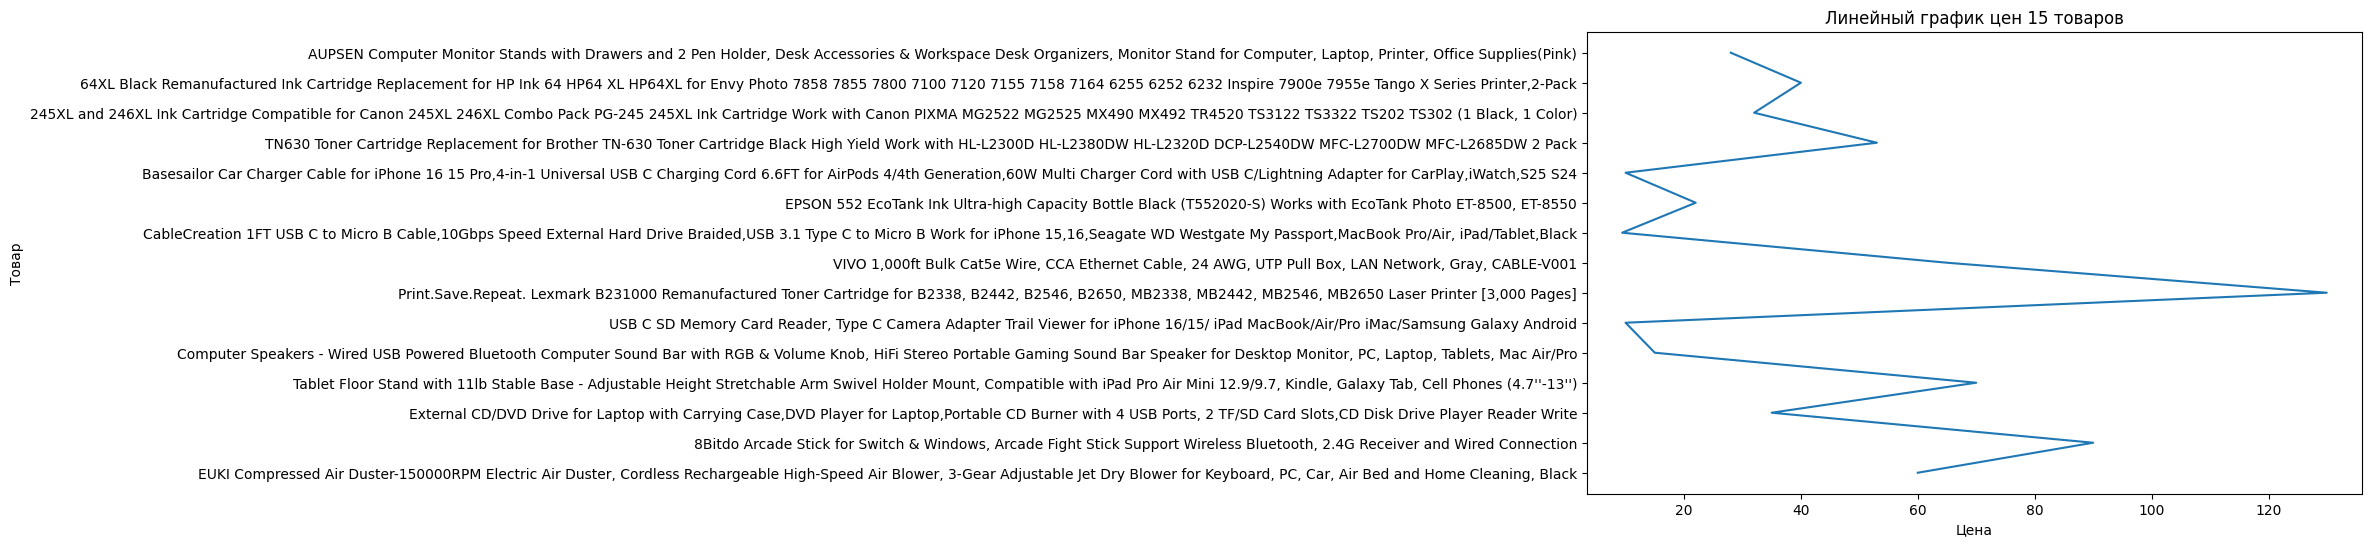

In [ ]:
import matplotlib.pyplot as plt

df_prod = df.iloc[:15, df.columns.get_loc('Название товара')]
df_prod
df_price = df.iloc[:15, df.columns.get_loc('Цена')]
df_price
sorted_price = df_price.sort_values()

plt.figure(figsize=(10, 6))
plt.plot(df_price, df_prod)
plt.xlabel('Цена')
plt.ylabel('Товар')
plt.title('Линейный график цен 15 товаров')

Text(0.5, 1.0, 'Точечный график популярности 15 товаров')

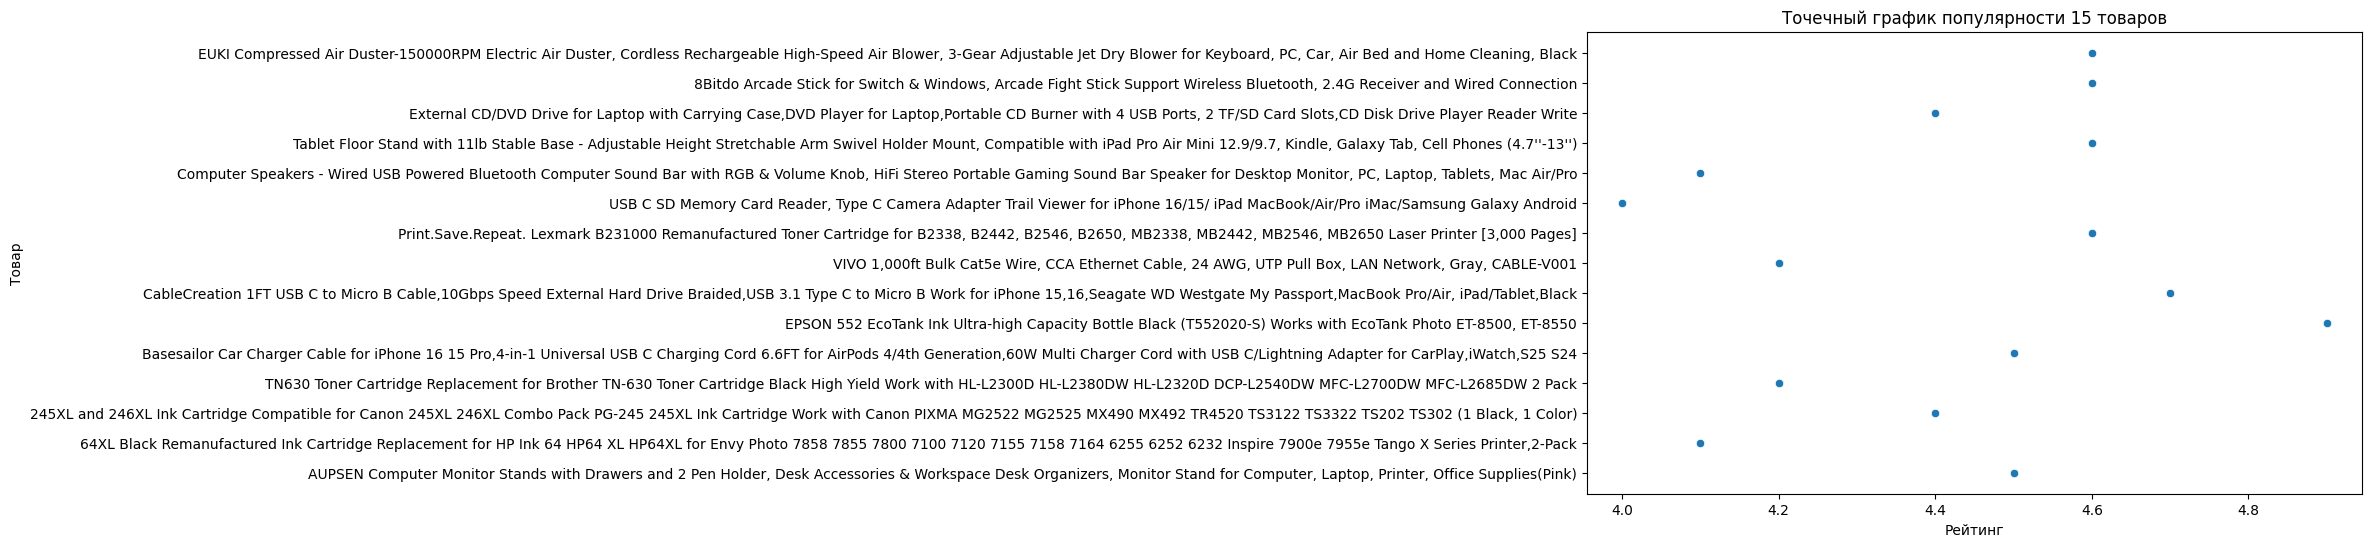

In [ ]:
import seaborn as sns

df_rate = df.iloc[:20, df.columns.get_loc('Рейтинг')]

plt.figure(figsize=(10, 6))
sns.scatterplot(x = df_rate, y = df_prod)
plt.xlabel('Рейтинг')
plt.ylabel('Товар')
plt.title('Точечный график популярности 15 товаров')

Text(0.5, 1.0, 'Точечный график рейтинга к цене')

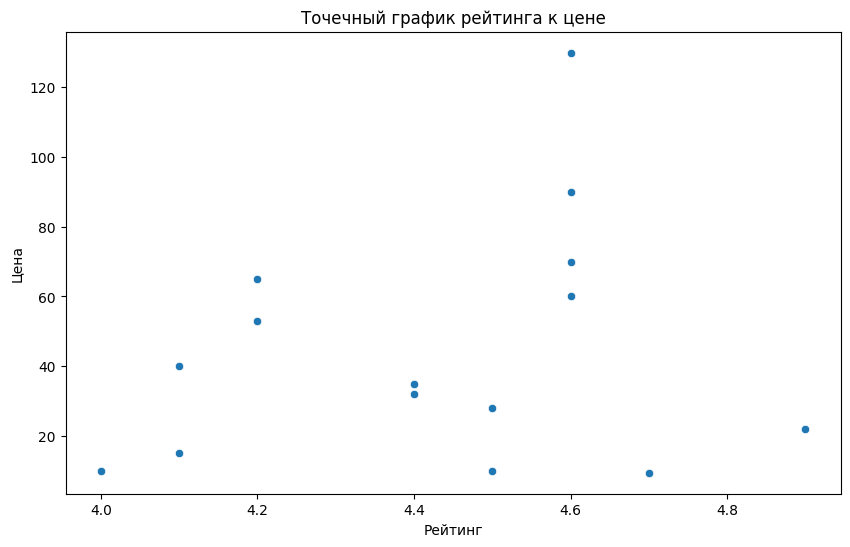

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df_rate, y = df_price)
plt.xlabel('Рейтинг')
plt.ylabel('Цена')
plt.title('Точечный график рейтинга к цене')